In [43]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib
matplotlib.use('TkAgg')


In [44]:
import matplotlib.pyplot as plt

In [45]:
p = Path("./Datasets/")

dirs = p.glob("*")

image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Pikachu":0,"Bulbasaur":1,"Charizard":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Charizard"}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemen
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)




Datasets\Bulbasaur
176
Datasets\Charizard
52
Datasets\Pikachu
199


In [46]:
## Visualization

In [47]:
import numpy as np

print(len(image_data))
print(len(labels))

427
427


In [48]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(427, 40, 40, 3)
(427,)


In [49]:
#Draw some pokemons
def drawImg(img,label):
    plt.imshow(img)
    plt.show()


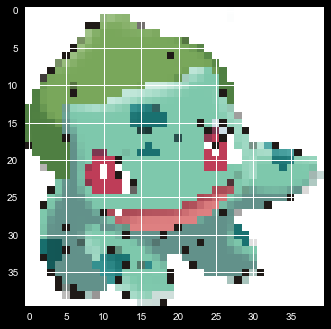

In [50]:
drawImg(X[0]/255.0,label[0])

In [51]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
# Normalisation
X = X/255.0

In [52]:
print(Y)

[1 0 0 2 1 0 2 0 1 0 1 0 2 1 0 2 1 0 0 0 0 2 0 1 1 1 0 0 0 0 1 1 1 0 1 1 2
 0 0 0 1 1 1 0 0 0 2 1 1 1 1 0 0 1 0 1 0 0 1 0 2 0 1 2 0 1 0 1 2 0 0 2 1 0
 2 0 1 1 1 0 0 0 2 1 0 1 0 0 2 1 1 0 1 1 0 0 0 2 0 1 0 1 0 0 0 0 0 1 1 1 2
 1 0 1 0 0 2 2 1 1 1 0 1 2 1 2 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 2 1 2 1 2 0
 1 0 1 0 0 0 1 0 2 1 1 0 0 2 0 1 0 0 1 1 0 0 2 0 1 1 2 1 0 0 0 1 2 1 1 0 0
 0 1 2 0 2 1 2 2 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 2 1 1 1 2 1 1 0 1 1 0 1 0
 0 2 2 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1 0 0 1 1 0 0 0 2 0 1 0 0 0 0 0
 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 0 1 1 1 0 0 2 2 1 0 0 0 0 1 1 0 1 2 0 2
 0 1 1 0 1 2 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 2
 1 0 0 0 0 1 0 1 2 0 0 1 1 0 1 1 1 1 2 0 0 2 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1
 0 1 1 0 2 0 0 1 2 0 1 1 0 0 1 0 1 1 1 1]


In [53]:
# Draw some pokemons
def drawImg2(img, label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()


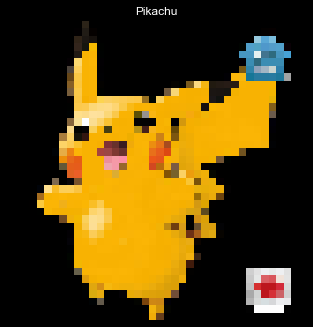

In [54]:
for i in range(1,20):
    drawImg2(X[i].reshape(40,40,3),Y[i])

In [55]:
### Create Training and Testing Set

split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:split,:]
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(341, 40, 40, 3) (341,)
(86, 40, 40, 3) (86,)


In [56]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [57]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [58]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [59]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features(40X40X3)

In [60]:
print(X.shape)

X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(341, 40, 40, 3)
(341, 4800)
(86, 4800)


In [ ]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2366
Epoch 50 Loss 0.2196
Epoch 100 Loss 0.0944
Epoch 150 Loss 0.0666
Epoch 200 Loss 0.0542
Epoch 250 Loss 0.0461
Epoch 300 Loss 0.0390


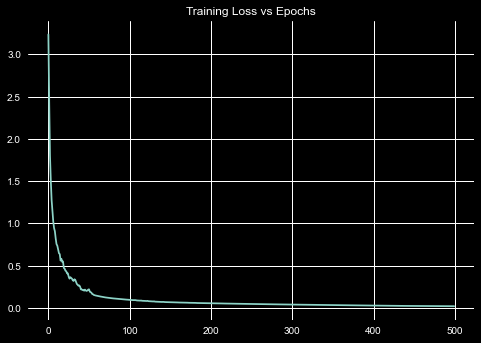

In [19]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [20]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9883
Test Acc 0.6395


In [23]:
import visualize
dir(visualize)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'add_path',
 'draw_line_chart',
 'grid_attention_visualization',
 'line_chart',
 'load_data_from_txt',
 'region_attention_visualization',
 'visualize_grid_attention',
 'visualize_grid_attention_v2',
 'visualize_region_attention']

[[160   2   1]
 [  1 133   0]
 [  0   0  44]]


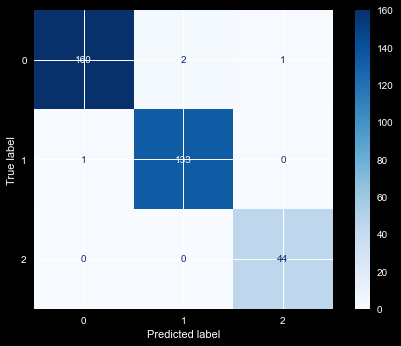

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
outputs = model.predict(X)
#cnf_matrix = confusion_matrix(outputs,Y)
cm = confusion_matrix(outputs,Y)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       163
           1       0.99      0.99      0.99       134
           2       0.98      1.00      0.99        44

    accuracy                           0.99       341
   macro avg       0.99      0.99      0.99       341
weighted avg       0.99      0.99      0.99       341



              precision    recall  f1-score   support

           0       0.61      0.70      0.65        33
           1       0.71      0.76      0.73        38
           2       0.43      0.20      0.27        15

    accuracy                           0.64        86
   macro avg       0.58      0.55      0.55        86
weighted avg       0.62      0.64      0.62        86



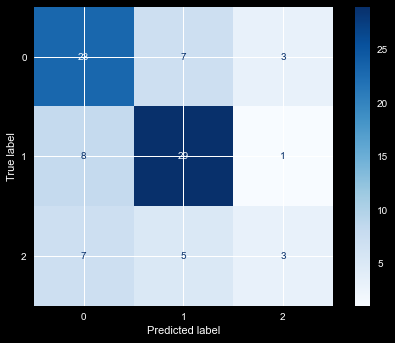

In [41]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cm = confusion_matrix(test_outputs,YTest)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp1.plot(cmap=plt.cm.Blues)

Prediction 35 Pikachu
Prediction 53 Pikachu
Prediction 70 Bulbasaur
Prediction 97 Pikachu


C:\Users\rishi\AppData\Local\Temp\ipykernel_30284\1012285794.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


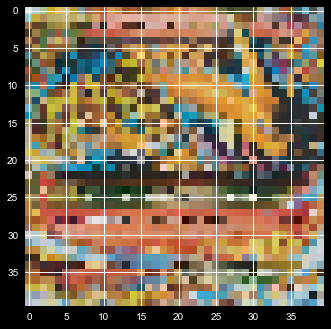

In [42]:
for i in range(Y.shape[0]):
    